In [1]:
library(dplyr)
library(readxl)
library(edgeR)
library(ComplexHeatmap)
library(circlize)
library(pheatmap)
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)
library(ReactomePA)
library(ggplot2)
library(EnhancedVolcano)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma

Loading required package: grid

ComplexHeatmap version 2.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: h

In [2]:
gse <- "~//shared/NGS/GSE168831_fpkm_genename.xlsx"

In [3]:
exp_data <- read_xlsx(gse)

New names:
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`


In [4]:
selected_columns <- c("gene_id", "gene_name", "WT_1_A", "WT_1_B", "WT_1_C", "WT_2_A", "WT_2_B", "WT_2_C", 
                      "ALS_C1_A", "ALS_C1_B", "ALS_C1_C", "ALS_C2_A", "ALS_C2_B", "ALS_C2_C", 
                      "ALS_F1_A", "ALS_F1_B", "ALS_F1_C", "ALS_F2_A", "ALS_F2_B", "ALS_F2_C")

In [5]:
head(exp_data)

gene_id,WT_1_A,WT_1_B,WT_1_C,WT_2_A,WT_2_B,WT_2_C,ALS_C1_A,ALS_C1_B,ALS_C1_C,⋯,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family,...29,...30,...31,...32
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000275335,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.3785568,0.000000,0.00000,⋯,52336642,-,86,miRNA,microRNA 8088 [Source:HGNC Symbol,Acc:HGNC:50167],-,NA,NA,NA
ENSG00000232927,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.000000,0.00000,⋯,3683868,+,1064,processed_pseudogene,ubiquitin specific peptidase 12 pseudogene Y-linked [Source:HGNC Symbol,Acc:HGNC:23195],-,NA,NA,NA
ENSG00000223677,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.000000,0.00000,⋯,29027607,-,928,unprocessed_pseudogene,olfactory receptor family 2 subfamily AD member 1 pseudogene [Source:HGNC Symbol,Acc:HGNC:14749],-,NA,NA,NA
ENSG00000054282,21.70925,20.71803,21.19354,21.32839,21.50682,19.21771,21.8703621,21.649737,21.56879,⋯,243500092,+,5322,protein_coding,serologically defined colon cancer antigen 8 [Source:HGNC Symbol,Acc:HGNC:10671],-,NA,NA,NA
ENSG00000255233,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.169659,0.00000,⋯,93241168,+,400,lincRNA,novel transcript,-,NA,NA,NA,NA
ENSG00000226344,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.000000,0.00000,⋯,23479798,+,362,unprocessed_pseudogene,cystatin 12,pseudogene [Source:HGNC Symbol,Acc:HGNC:31920],-,NA,NA


In [6]:
data <- exp_data[, selected_columns] 

In [7]:
colnames(data)

[1] "gene_id"   "gene_name" "WT_1_A"    "WT_1_B"    "WT_1_C"    "WT_2_A"   
 [7] "WT_2_B"    "WT_2_C"    "ALS_C1_A"  "ALS_C1_B"  "ALS_C1_C"  "ALS_C2_A" 
[13] "ALS_C2_B"  "ALS_C2_C"  "ALS_F1_A"  "ALS_F1_B"  "ALS_F1_C"  "ALS_F2_A" 
[19] "ALS_F2_B"  "ALS_F2_C"

In [8]:
head(data)

gene_id,gene_name,WT_1_A,WT_1_B,WT_1_C,WT_2_A,WT_2_B,WT_2_C,ALS_C1_A,ALS_C1_B,ALS_C1_C,ALS_C2_A,ALS_C2_B,ALS_C2_C,ALS_F1_A,ALS_F1_B,ALS_F1_C,ALS_F2_A,ALS_F2_B,ALS_F2_C
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000275335,MIR8088,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.3785568,0.000000,0.00000,0.00000,0.00000,0.4143107,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000
ENSG00000232927,USP12PY,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.0000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000
ENSG00000223677,OR2AD1P,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.0000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000
ENSG00000054282,SDCCAG8,21.70925,20.71803,21.19354,21.32839,21.50682,19.21771,21.8703621,21.649737,21.56879,17.09229,17.27925,20.3291854,20.46791,18.30839,19.1244,21.49865,22.21036,23.4997
ENSG00000255233,AP003969.1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.169659,0.00000,0.00000,0.00000,0.0000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000
ENSG00000226344,CST12P,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000000,0.000000,0.00000,0.00000,0.00000,0.0000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000


In [9]:
mito_genes <- data[grep("^MT-", data$gene_name), ]
ribo_genes <- data[grep("^RPS|^RPL", data$gene_name), ]

total_expression <- colSums(data[,-c(1,2)])

total_mito_expression <- colSums(mito_genes[,-c(1,2)])
total_ribo_expression <- colSums(ribo_genes[,-c(1,2)])

percent_mito <- (total_mito_expression / total_expression) * 100
percent_ribo <- (total_ribo_expression / total_expression) * 100

percentages <- data.frame(Sample = colnames(data)[-c(1,2)],
                          Percent_Mito = percent_mito,
                          Percent_Ribo = percent_ribo)

print(percentages)

           Sample Percent_Mito Percent_Ribo
WT_1_A     WT_1_A     5.156346     6.767978
WT_1_B     WT_1_B     5.167558     6.745173
WT_1_C     WT_1_C     5.326674     7.097243
WT_2_A     WT_2_A     7.324718     6.145828
WT_2_B     WT_2_B     6.557244     6.213451
WT_2_C     WT_2_C     6.403815     5.544417
ALS_C1_A ALS_C1_A     5.936031     6.895313
ALS_C1_B ALS_C1_B     6.390507     6.284896
ALS_C1_C ALS_C1_C     6.325212     6.105162
ALS_C2_A ALS_C2_A     5.540307     8.326693
ALS_C2_B ALS_C2_B     5.566409     8.985078
ALS_C2_C ALS_C2_C     5.955195     8.396795
ALS_F1_A ALS_F1_A     5.323669     8.093712
ALS_F1_B ALS_F1_B     5.941460     8.049419
ALS_F1_C ALS_F1_C     5.497657     8.501919
ALS_F2_A ALS_F2_A     6.763984     7.433038
ALS_F2_B ALS_F2_B     8.274891     6.934609
ALS_F2_C ALS_F2_C     8.100417     7.690219


In [10]:
Condition <- factor(c(rep("WT", 6), rep("ALS_C", 6), rep("ALS_F", 6)))
RNA_data <- DGEList(counts=data, group=Condition)
keep <- rowSums(cpm(RNA_data) > 1) >= 2
RNA_data_filtered <- RNA_data[keep,,keep.lib.sizes=FALSE]

Non-numeric columns found: setting first 2 columns of `counts` to be gene annotation.



In [11]:
RNA_data_filtered <- calcNormFactors(RNA_data_filtered)
RNA_data_filtered <- estimateCommonDisp(RNA_data_filtered, verbose=TRUE)
RNA_data_filtered <- estimateTagwiseDisp(RNA_data_filtered)

Disp = 0.00909 , BCV = 0.0953 


In [12]:
colnames(RNA_data_filtered)

[1] "WT_1_A"   "WT_1_B"   "WT_1_C"   "WT_2_A"   "WT_2_B"   "WT_2_C"  
 [7] "ALS_C1_A" "ALS_C1_B" "ALS_C1_C" "ALS_C2_A" "ALS_C2_B" "ALS_C2_C"
[13] "ALS_F1_A" "ALS_F1_B" "ALS_F1_C" "ALS_F2_A" "ALS_F2_B" "ALS_F2_C"

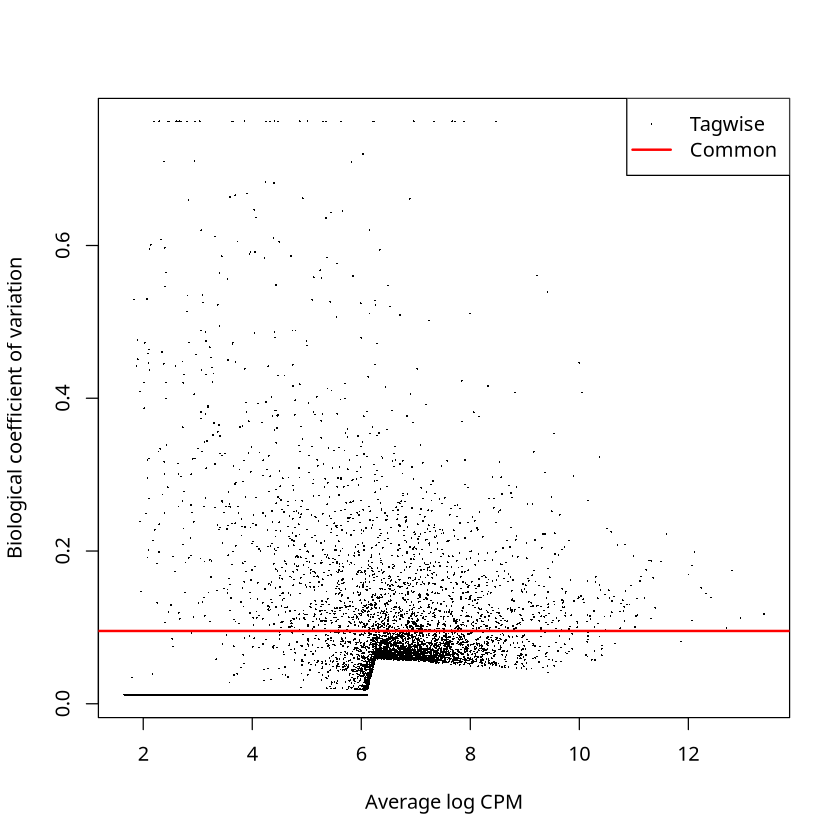

In [13]:
plotBCV(RNA_data_filtered)

In [14]:
et_WT_vs_ALS_C <- exactTest(RNA_data_filtered, pair=c("WT", "ALS_C"))
topTags(et_WT_vs_ALS_C)

,gene_id,gene_name,logFC,logCPM,PValue,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
13520,ENSG00000164692,COL1A2,3.3995240,5.744863,5.520640e-18,1.115997e-13
26895,ENSG00000107796,ACTA2,1.2269141,5.545485,1.767420e-13,1.786420e-09
41107,ENSG00000176971,FIBIN,-1.5827193,5.044484,5.913973e-13,3.985032e-09
49804,ENSG00000183878,UTY,5.7738325,3.283580,1.835845e-12,9.277903e-09
9238,ENSG00000145632,PLK2,0.7739737,7.081044,4.104595e-10,1.547992e-06
32649,ENSG00000171223,JUNB,1.1688999,5.223102,4.594584e-10,1.547992e-06
29379,ENSG00000168542,COL3A1,4.0080381,6.889370,5.770441e-10,1.664933e-06
53318,ENSG00000167617,CDC42EP5,1.9666002,4.736716,6.588902e-10,1.664933e-06
56072,ENSG00000116717,GADD45A,1.2117743,5.639933,7.479214e-10,1.679915e-06


In [15]:
et_WT_vs_ALS_F <- exactTest(RNA_data_filtered, pair=c("WT", "ALS_F"))
topTags(et_WT_vs_ALS_F)

,gene_id,gene_name,logFC,logCPM,PValue,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
38402,ENSG00000204525,HLA-C,-2.0186132,7.087671,8.259535e-19,1.669665e-14
5461,ENSG00000117519,CNN3,0.6369154,8.149633,1.392689e-17,1.407661e-13
50993,ENSG00000132688,NES,0.7482391,7.581693,1.246607e-14,8.400054e-11
4978,ENSG00000184144,CNTN2,1.1133227,5.752054,2.599250e-14,1.313596e-10
31198,ENSG00000114251,WNT5A,-1.0114169,6.736707,2.033159e-13,7.321076e-10
36190,ENSG00000132646,PCNA,0.9795504,6.027175,2.172964e-13,7.321076e-10
39649,ENSG00000157103,SLC6A1,-1.3413076,5.383865,5.200627e-13,1.426564e-09
53591,ENSG00000196776,CD47,-0.5813613,8.433906,5.645567e-13,1.426564e-09
19670,ENSG00000169100,SLC25A6,0.5869579,8.956705,6.974920e-13,1.566645e-09


In [16]:
et_ALS_C_vs_ALS_F <- exactTest(RNA_data_filtered, pair=c("ALS_C", "ALS_F"))
topTags(et_ALS_C_vs_ALS_F)

,gene_id,gene_name,logFC,logCPM,PValue,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
38402,ENSG00000204525,HLA-C,-2.4645190,7.087671,1.487829e-27,3.007646e-23
45434,ENSG00000147813,NAPRT,-3.6140783,4.461147,1.126487e-22,1.138596e-18
4978,ENSG00000184144,CNTN2,1.1502480,5.752054,2.484011e-15,1.673810e-11
13606,ENSG00000237506,RPSAP15,4.2987652,4.471029,3.783437e-15,1.912055e-11
41107,ENSG00000176971,FIBIN,1.6561232,5.044484,1.542224e-14,6.235211e-11
24397,ENSG00000100593,ISM2,-1.6737189,4.913174,1.857924e-14,6.259654e-11
45259,ENSG00000233098,CCDC144NL-AS1,-3.5536301,5.184053,4.533542e-14,1.309222e-10
53591,ENSG00000196776,CD47,-0.5910759,8.433906,2.016165e-13,5.094597e-10
8320,ENSG00000214548,MEG3,-6.0207527,7.336972,2.948015e-13,6.621570e-10


In [17]:
WTvsC9 <- et_WT_vs_ALS_C
WTvsFUS <- et_WT_vs_ALS_F
C9vsFUS <- et_ALS_C_vs_ALS_F

In [18]:
WTvsC9$table$gene_id <- WTvsC9$genes[,1]
WTvsFUS$table$gene_id <- WTvsFUS$genes[,1]
C9vsFUS$table$gene_id <- C9vsFUS$genes[,1]

In [19]:
WTvsC9$table$gene_name <- exp_data$gene_name[match(WTvsC9$table$gene_id, exp_data$gene_id)]
WTvsFUS$table$gene_name <- exp_data$gene_name[match(WTvsFUS$table$gene_id, exp_data$gene_id)]
C9vsFUS$table$gene_name <- exp_data$gene_name[match(WTvsC9$table$gene_id, exp_data$gene_id)]

WTvsC9$table$gene_description <- exp_data$gene_description[match(WTvsC9$table$gene_id, exp_data$gene_id)]
WTvsFUS$table$gene_description <- exp_data$gene_description[match(WTvsFUS$table$gene_id, exp_data$gene_id)]
C9vsFUS$table$gene_description <- exp_data$gene_description[match(WTvsC9$table$gene_id, exp_data$gene_id)]

In [20]:
head(WTvsC9$table)
head(WTvsFUS$table)
head(C9vsFUS$table)

,logFC,logCPM,PValue,gene_id,gene_name,gene_description
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
4,-0.08806788,5.093085,0.65593458,ENSG00000054282,SDCCAG8,serologically defined colon cancer antigen 8 [Source:HGNC Symbol
10,-0.18155461,7.651339,0.04012866,ENSG00000125505,MBOAT7,membrane bound O-acyltransferase domain containing 7 [Source:HGNC Symbol
12,0.19434342,5.498442,0.24999525,ENSG00000115020,PIKFYVE,phosphoinositide kinase
17,-0.13567943,5.644810,0.40337037,ENSG00000100246,DNAL4,dynein axonemal light chain 4 [Source:HGNC Symbol
21,0.06060106,3.907994,0.84091373,ENSG00000135338,LCA5,LCA5
23,-0.04512156,4.844330,0.88854375,ENSG00000086848,ALG9,ALG9


,logFC,logCPM,PValue,gene_id,gene_name,gene_description
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
4,0.008460162,5.093085,1.0000000,ENSG00000054282,SDCCAG8,serologically defined colon cancer antigen 8 [Source:HGNC Symbol
10,-0.117269015,7.651339,0.1874053,ENSG00000125505,MBOAT7,membrane bound O-acyltransferase domain containing 7 [Source:HGNC Symbol
12,0.162521631,5.498442,0.3458798,ENSG00000115020,PIKFYVE,phosphoinositide kinase
17,0.049446751,5.644810,0.7603406,ENSG00000100246,DNAL4,dynein axonemal light chain 4 [Source:HGNC Symbol
21,-0.123021521,3.907994,0.7547813,ENSG00000135338,LCA5,LCA5
23,0.022842740,4.844330,0.9445437,ENSG00000086848,ALG9,ALG9


,logFC,logCPM,PValue,gene_id,gene_name,gene_description
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
4,0.09652562,5.093085,0.6098890,ENSG00000054282,SDCCAG8,serologically defined colon cancer antigen 8 [Source:HGNC Symbol
10,0.06428397,7.651339,0.4804746,ENSG00000125505,MBOAT7,membrane bound O-acyltransferase domain containing 7 [Source:HGNC Symbol
12,-0.03181219,5.498442,0.8725274,ENSG00000115020,PIKFYVE,phosphoinositide kinase
17,0.18512462,5.644810,0.2327838,ENSG00000100246,DNAL4,dynein axonemal light chain 4 [Source:HGNC Symbol
21,-0.18363131,3.907994,0.6064966,ENSG00000135338,LCA5,LCA5
23,0.06796371,4.844330,0.7792465,ENSG00000086848,ALG9,ALG9


In [21]:
write.csv(WTvsC9$table, "~//shared/NGS/WTvsC9.csv")
write.csv(WTvsFUS$table, "~//shared/NGS/WTvsFUS.csv")
write.csv(C9vsFUS$table, "~//shared/NGS/C9vsFUS.csv")

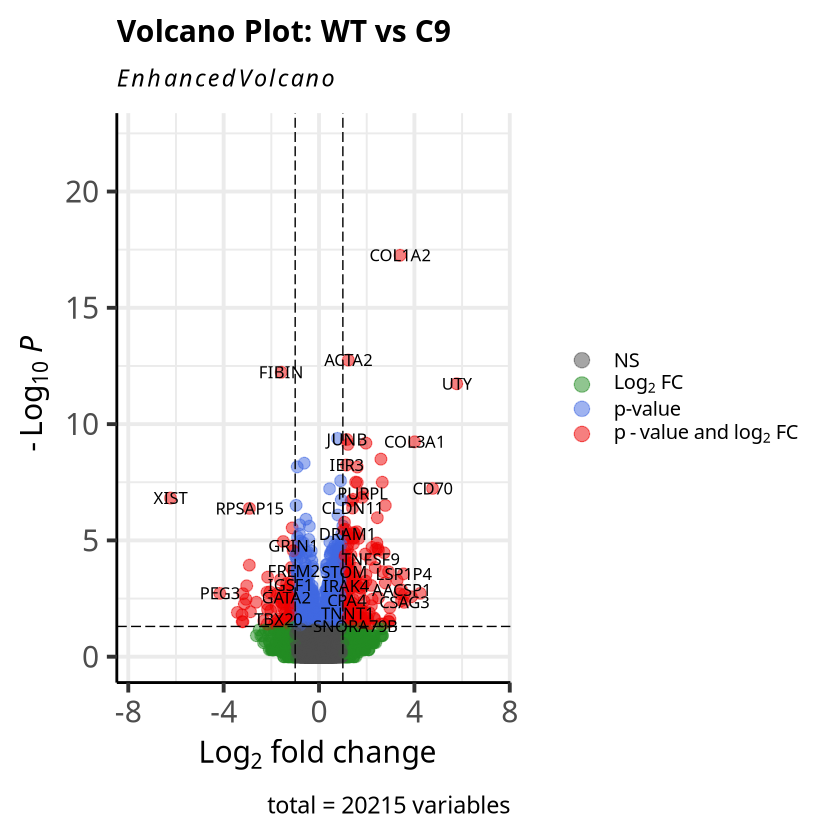

In [22]:
EnhancedVolcano(WTvsC9$table,
                lab = WTvsC9$table$gene_name,
                x = 'logFC',
                y = 'PValue',
                title = 'Volcano Plot: WT vs C9',
                pCutoff = 0.05,
                FCcutoff = 1.0,
                pointSize = 3.0,
                labSize = 3.5,
                col = c('grey30', 'forestgreen', 'royalblue', 'red2'),
                legendPosition = 'right',
                legendLabSize = 12,
                legendIconSize = 4.0)

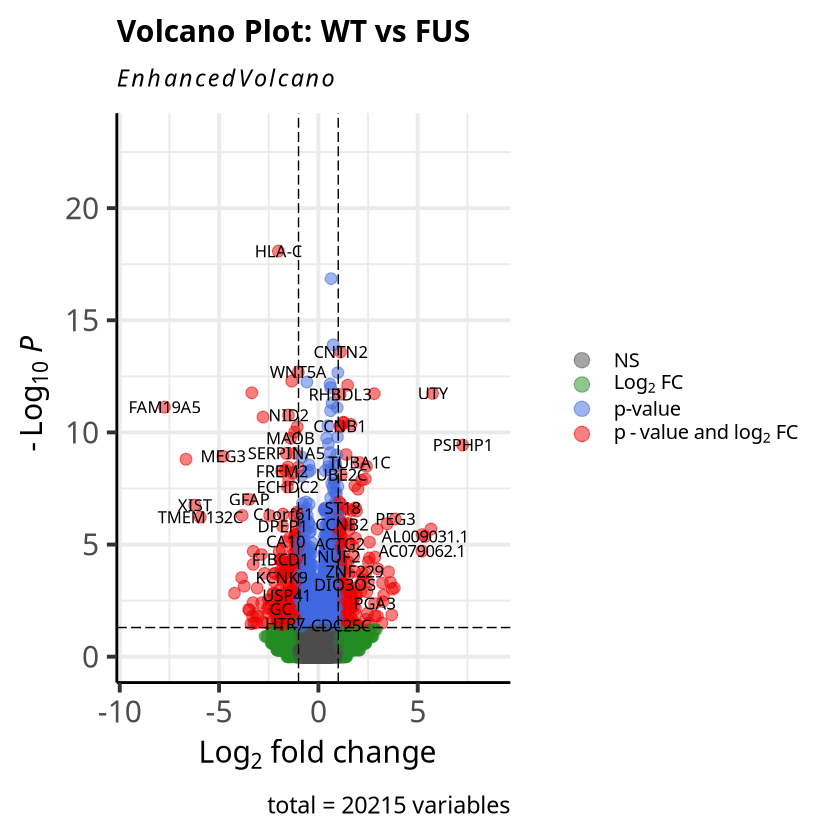

In [23]:
EnhancedVolcano(WTvsFUS$table,
                lab = WTvsFUS$table$gene_name,
                x = 'logFC',
                y = 'PValue',
                title = 'Volcano Plot: WT vs FUS',
                pCutoff = 0.05,
                FCcutoff = 1.0,
                pointSize = 3.0,
                labSize = 3.5,
                col = c('grey30', 'forestgreen', 'royalblue', 'red2'),
                legendPosition = 'right',
                legendLabSize = 12,
                legendIconSize = 4.0)

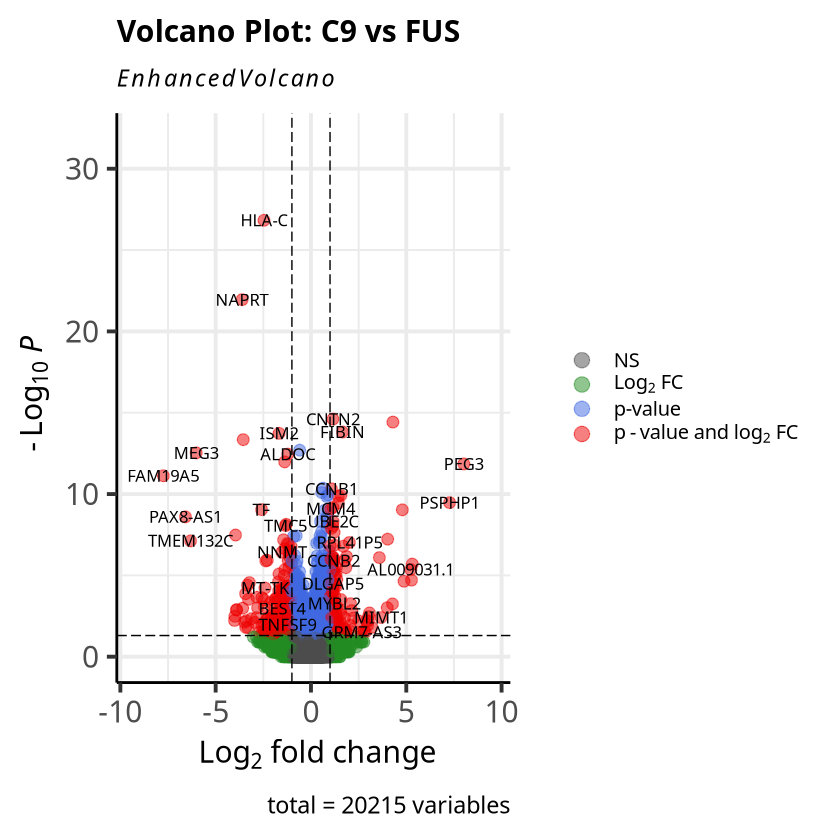

In [24]:
EnhancedVolcano(C9vsFUS$table,
                lab = C9vsFUS$table$gene_name,
                x = 'logFC',
                y = 'PValue',
                title = 'Volcano Plot: C9 vs FUS',
                pCutoff = 0.05,
                FCcutoff = 1.0,
                pointSize = 3.0,
                labSize = 3.5,
                col = c('grey30', 'forestgreen', 'royalblue', 'red2'),
                legendPosition = 'right',
                legendLabSize = 12,
                legendIconSize = 4.0)

In [25]:
top_genes_WTvsC9 <- WTvsC9$table$gene_name[order(WTvsC9$table$PValue)][1:25]
top_genes_WTvsFUS <- WTvsFUS$table$gene_name[order(WTvsFUS$table$PValue)][1:25]
top_genes_C9vsFUS <- C9vsFUS$table$gene_name[order(C9vsFUS$table$PValue)][1:25]

In [26]:
heatmap_data_WTvsC9 <- exp_data[exp_data$gene_name %in% top_genes_WTvsC9, c('WT_1_A', 'WT_1_B', 'WT_1_C', 'WT_2_A', 'WT_2_B', 'WT_2_C', 
                                                                    'ALS_C1_A', 'ALS_C1_B', 'ALS_C1_C', 'ALS_C2_A', 'ALS_C2_B', 'ALS_C2_C')]

heatmap_data_WTvsFUS <- exp_data[exp_data$gene_name %in% top_genes_WTvsFUS, c('WT_1_A', 'WT_1_B', 'WT_1_C', 'WT_2_A', 'WT_2_B', 'WT_2_C', 
                                                                      'ALS_F1_A', 'ALS_F1_B', 'ALS_F1_C', 'ALS_F2_A', 'ALS_F2_B', 'ALS_F2_C')]

heatmap_data_C9vsFUS <- exp_data[exp_data$gene_name %in% top_genes_C9vsFUS, c('ALS_C1_A', 'ALS_C1_B', 'ALS_C1_C', 'ALS_C2_A', 'ALS_C2_B', 'ALS_C2_C', 
                                                                      'ALS_F1_A', 'ALS_F1_B', 'ALS_F1_C', 'ALS_F2_A', 'ALS_F2_B', 'ALS_F2_C')]


In [27]:
heatmap_data_WTvsC9 <- log2(heatmap_data_WTvsC9 + 1)
heatmap_data_WTvsFUS <- log2(heatmap_data_WTvsFUS + 1)
heatmap_data_C9vsFUS <- log2(heatmap_data_C9vsFUS + 1)

In [28]:
rownames(heatmap_data_WTvsC9) <- exp_data$gene_name[exp_data$gene_name %in% top_genes_WTvsC9]
rownames(heatmap_data_WTvsFUS) <- exp_data$gene_name[exp_data$gene_name %in% top_genes_WTvsFUS]
rownames(heatmap_data_C9vsFUS) <- exp_data$gene_name[exp_data$gene_name %in% top_genes_C9vsFUS]

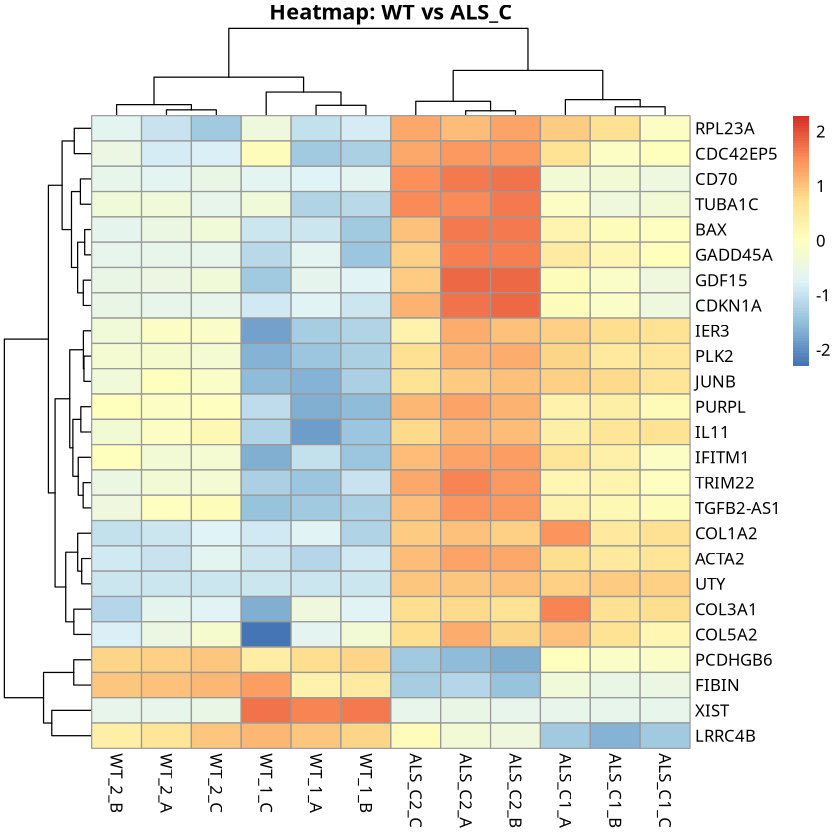

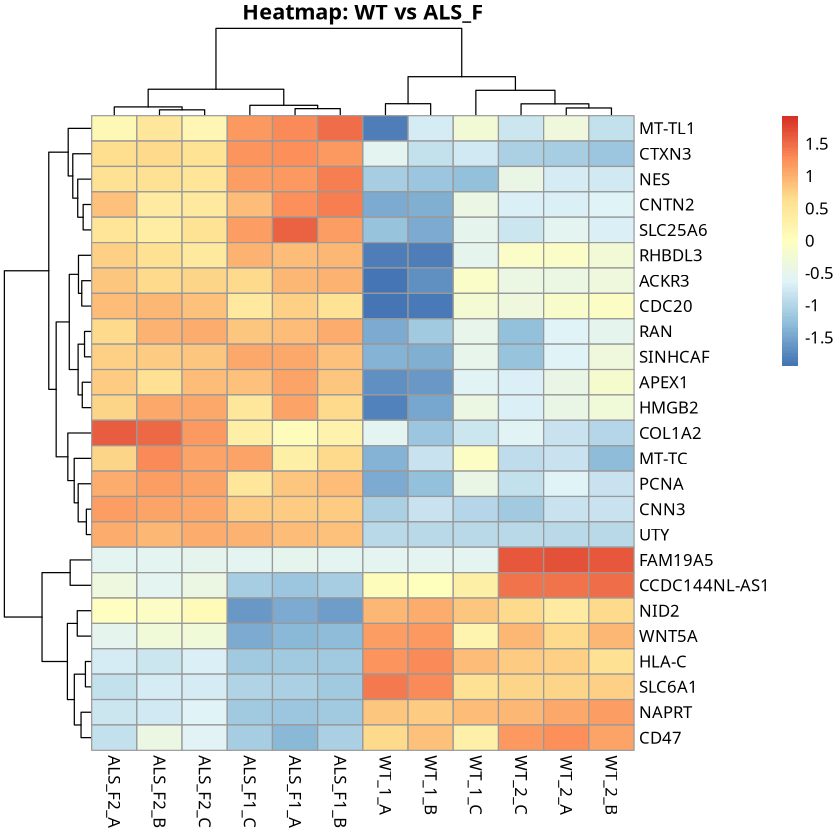

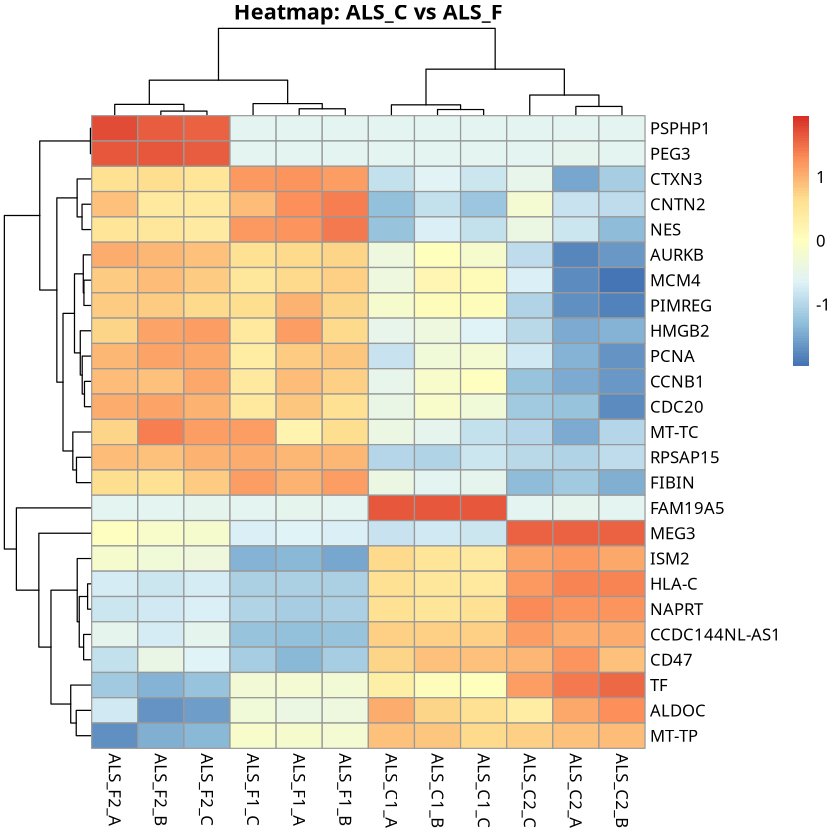

In [29]:
pheatmap(heatmap_data_WTvsC9, cluster_rows=TRUE, cluster_cols=TRUE, scale="row",
         main="Heatmap: WT vs ALS_C")

pheatmap(heatmap_data_WTvsFUS, cluster_rows=TRUE, cluster_cols=TRUE, scale="row",
         main="Heatmap: WT vs ALS_F")

pheatmap(heatmap_data_C9vsFUS, cluster_rows=TRUE, cluster_cols=TRUE, scale="row",
         main="Heatmap: ALS_C vs ALS_F")

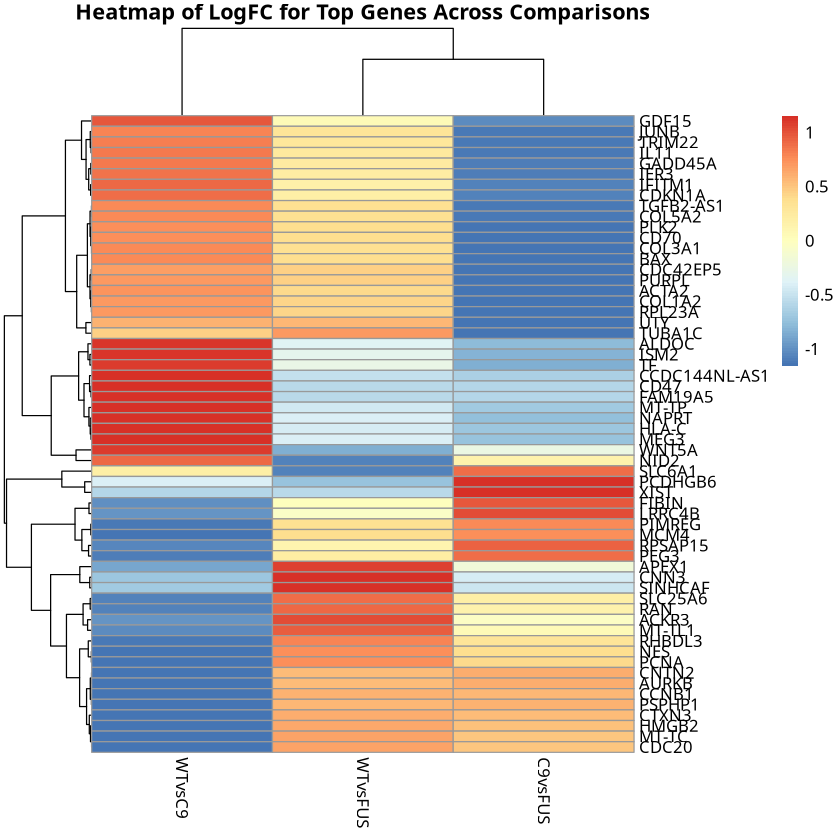

In [30]:
# Select top 50 genes based on P-value
top_genes_WTvsC9 <- WTvsC9$table$gene_name[order(WTvsC9$table$PValue)][1:25]
top_genes_WTvsFUS <- WTvsFUS$table$gene_name[order(WTvsFUS$table$PValue)][1:25]
top_genes_C9vsFUS <- C9vsFUS$table$gene_name[order(C9vsFUS$table$PValue)][1:25]

# Create a list of unique top genes
unique_genes <- unique(c(top_genes_WTvsC9, top_genes_WTvsFUS, top_genes_C9vsFUS))

# Create a matrix of logFC values for these genes across all comparisons
combined_logFC <- data.frame(
  WTvsC9 = WTvsC9$table$logFC[match(unique_genes, WTvsC9$table$gene_name)],
  WTvsFUS = WTvsFUS$table$logFC[match(unique_genes, WTvsFUS$table$gene_name)],
  C9vsFUS = C9vsFUS$table$logFC[match(unique_genes, C9vsFUS$table$gene_name)]
)

# Assign row names as gene names
rownames(combined_logFC) <- unique_genes

# Remove any rows with NAs (if any)
combined_logFC <- combined_logFC[complete.cases(combined_logFC), ]

# Plot the heatmap
pheatmap(
  mat = as.matrix(combined_logFC),
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  scale = "row",
  show_rownames = TRUE,
  show_colnames = TRUE,
  main = "Heatmap of LogFC for Top Genes Across Comparisons"
)

In [31]:
ranked_genes_WTvsC9 <- WTvsC9$table$logFC
names(ranked_genes_WTvsC9) <- WTvsC9$table$gene_name
ranked_genes_WTvsC9 <- sort(ranked_genes_WTvsC9, decreasing=TRUE)

ranked_genes_WTvsFUS <- WTvsFUS$table$logFC
names(ranked_genes_WTvsFUS) <- WTvsFUS$table$gene_name
ranked_genes_WTvsFUS <- sort(ranked_genes_WTvsFUS, decreasing=TRUE)

ranked_genes_C9vsFUS <- C9vsFUS$table$logFC
names(ranked_genes_C9vsFUS) <- C9vsFUS$table$gene_name
ranked_genes_C9vsFUS <- sort(ranked_genes_C9vsFUS, decreasing=TRUE)

In [32]:
gsea_WTvsC9 <- gseGO(geneList=ranked_genes_WTvsC9, 
                     ont="BP", # Biological Process
                     keyType="SYMBOL", 
                     minGSSize=10, 
                     maxGSSize=500, 
                     pvalueCutoff=0.05, 
                     OrgDb=org.Hs.eg.db, 
                     verbose=FALSE,
                     eps = 0)

gsea_WTvsFUS <- gseGO(geneList=ranked_genes_WTvsFUS, 
                      ont="BP", 
                      keyType="SYMBOL", 
                      minGSSize=10, 
                      maxGSSize=500, 
                      pvalueCutoff=0.05, 
                      OrgDb=org.Hs.eg.db, 
                      verbose=FALSE,
                      eps = 0)

gsea_C9vsFUS <- gseGO(geneList=ranked_genes_C9vsFUS, 
                      ont="BP", 
                      keyType="SYMBOL", 
                      minGSSize=10, 
                      maxGSSize=500, 
                      pvalueCutoff=0.05, 
                      OrgDb=org.Hs.eg.db, 
                      verbose=FALSE,
                      eps = 0)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


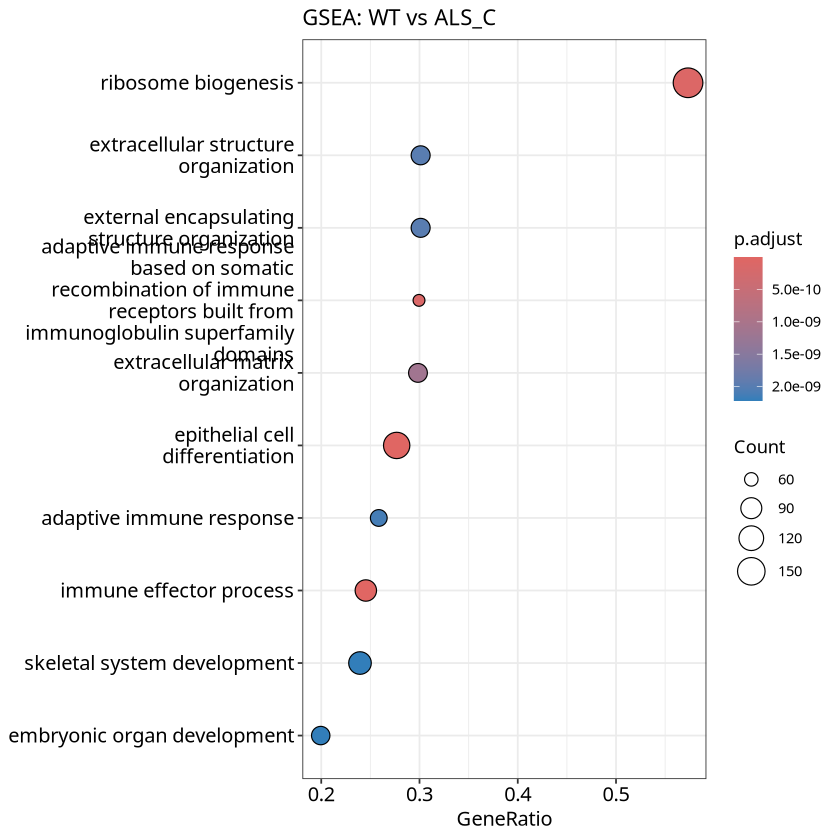

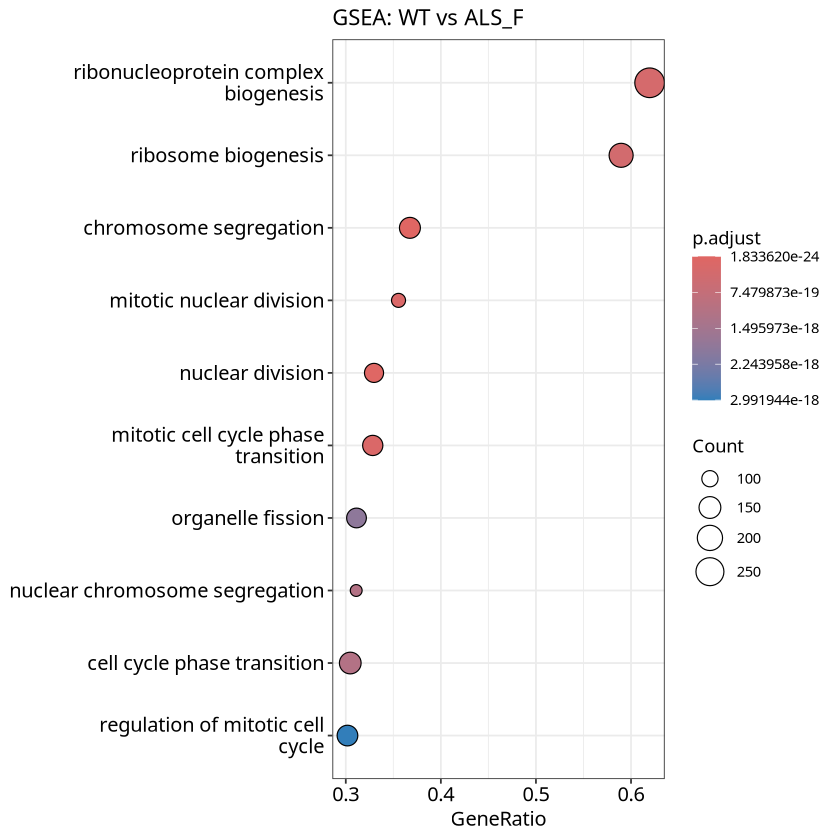

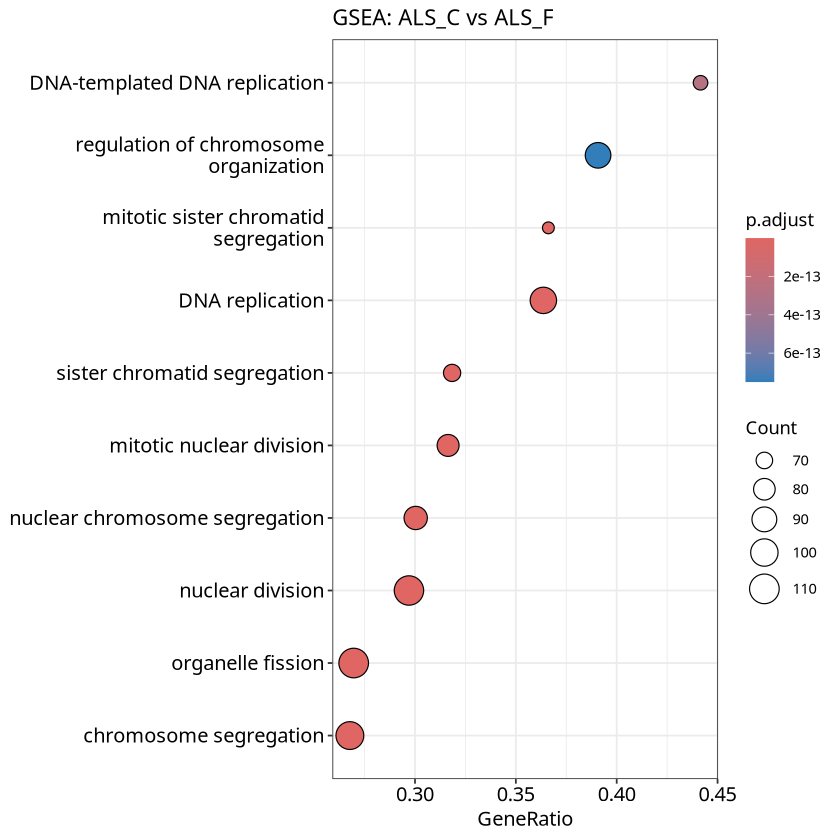

In [33]:
dotplot(gsea_WTvsC9, showCategory=10, title="GSEA: WT vs ALS_C")
dotplot(gsea_WTvsFUS, showCategory=10, title="GSEA: WT vs ALS_F")
dotplot(gsea_C9vsFUS, showCategory=10, title="GSEA: ALS_C vs ALS_F")

In [34]:
gsea_WTvsC9 <- pairwise_termsim(gsea_WTvsC9)
gsea_WTvsFUS <- pairwise_termsim(gsea_WTvsFUS)
gsea_C9vsFUS <- pairwise_termsim(gsea_C9vsFUS)

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


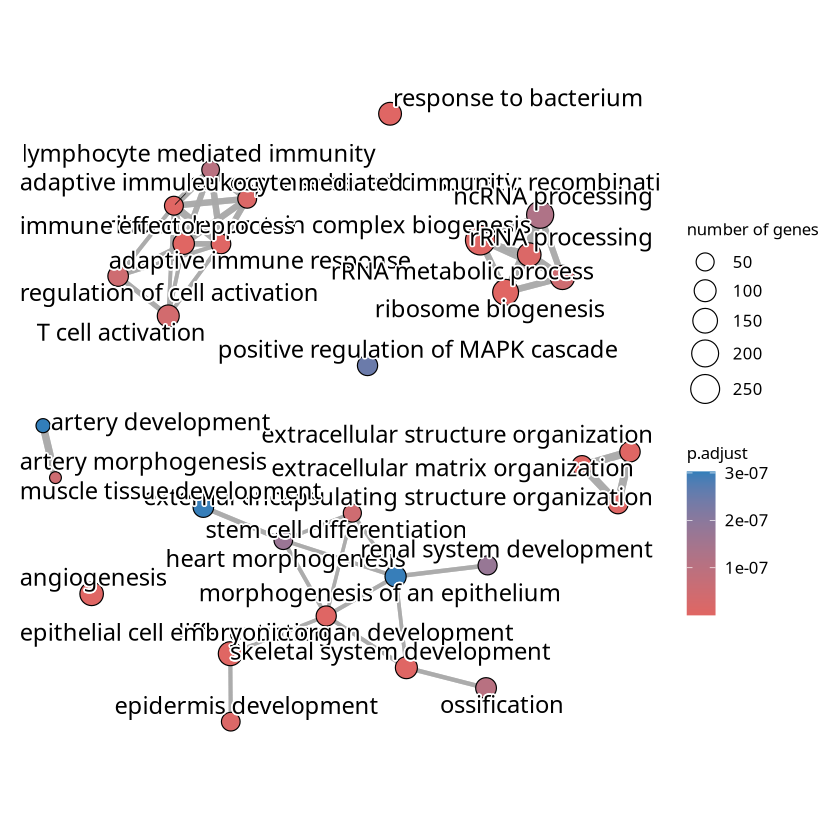

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


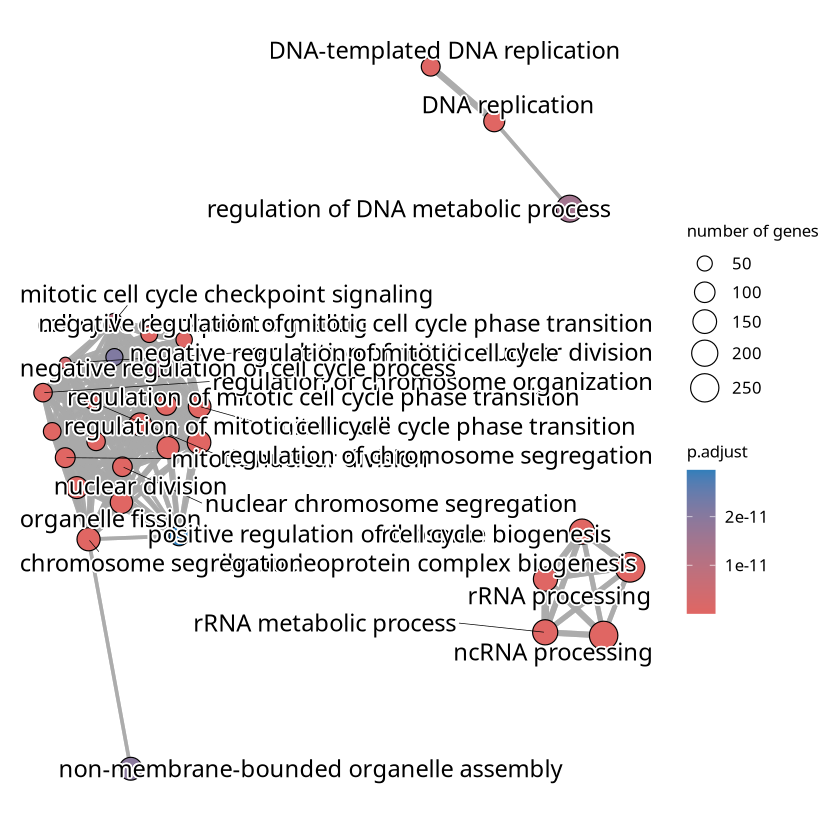

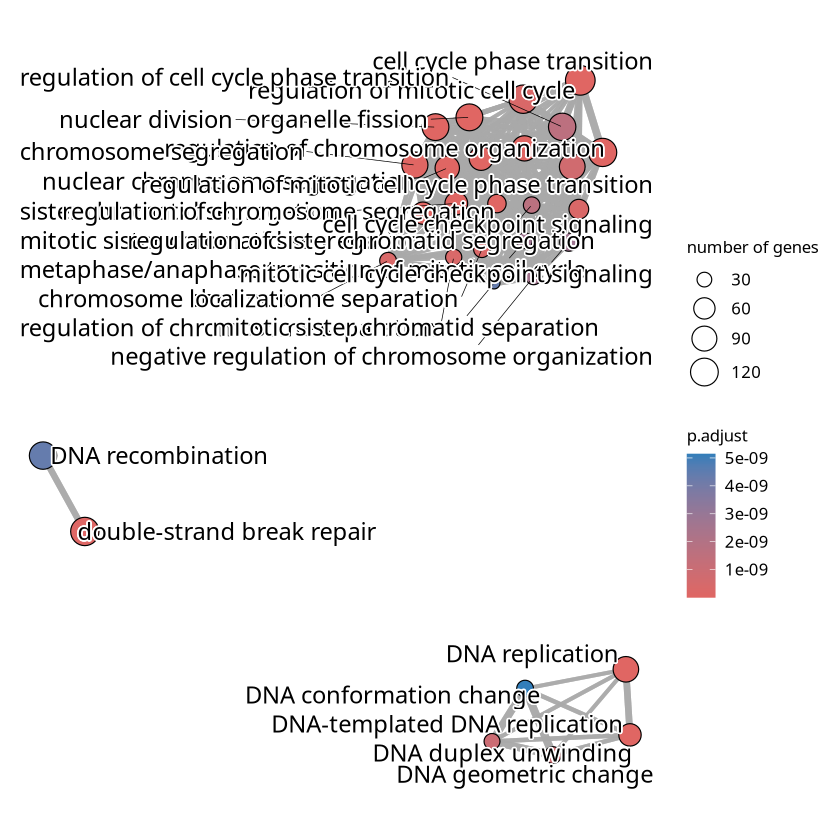

In [35]:
emapplot(gsea_WTvsC9)
emapplot(gsea_WTvsFUS)
emapplot(gsea_C9vsFUS)

In [36]:
reactome_genes_WTvsC9 <- WTvsC9$table$logFC
names(reactome_genes_WTvsC9) <- WTvsC9$table$gene_id
reactome_genes_WTvsC9 <- sort(reactome_genes_WTvsC9, decreasing=TRUE)

reactome_genes_WTvsFUS <- WTvsFUS$table$logFC
names(reactome_genes_WTvsFUS) <- WTvsFUS$table$gene_id
reactome_genes_WTvsFUS <- sort(reactome_genes_WTvsFUS, decreasing=TRUE)

reactome_genes_C9vsFUS <- C9vsFUS$table$logFC
names(reactome_genes_C9vsFUS) <- C9vsFUS$table$gene_id
reactome_genes_C9vsFUS <- sort(reactome_genes_C9vsFUS, decreasing=TRUE)

In [37]:
ensembl_WTvsC9 <- names(reactome_genes_WTvsC9)
ensembl_WTvsFUS <- names(reactome_genes_WTvsFUS)
ensembl_C9vsFUS <- names(reactome_genes_C9vsFUS)

head(ensembl_C9vsFUS)
head(ensembl_WTvsC9)
head(ensembl_WTvsFUS)

[1] "ENSG00000198300" "ENSG00000226278" "ENSG00000235254" "ENSG00000263711"
[5] "ENSG00000282024" "ENSG00000189229"

[1] "ENSG00000183878" "ENSG00000125726" "ENSG00000228985" "ENSG00000168542"
[5] "ENSG00000252469" "ENSG00000268916"

[1] "ENSG00000226278" "ENSG00000183878" "ENSG00000235254" "ENSG00000282024"
[5] "ENSG00000189229" "ENSG00000263711"

In [38]:
converted_WTvsC9 <- bitr(ensembl_WTvsC9, fromType = "ENSEMBL", 
                     toType = "ENTREZID", 
                     OrgDb = org.Hs.eg.db)
converted_WTvsFUS <- bitr(ensembl_WTvsFUS, fromType = "ENSEMBL", 
                     toType = "ENTREZID", 
                     OrgDb = org.Hs.eg.db)
converted_C9vsFUS <- bitr(ensembl_C9vsFUS, fromType = "ENSEMBL", 
                     toType = "ENTREZID", 
                     OrgDb = org.Hs.eg.db)

head(converted_C9vsFUS)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(ensembl_WTvsC9, fromType = "ENSEMBL", toType = "ENTREZID", :
“17.47% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(ensembl_WTvsFUS, fromType = "ENSEMBL", toType = "ENTREZID", :
“17.47% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(ensembl_C9vsFUS, fromType = "ENSEMBL", toType = "ENTREZID", :
“17.47% of input gene IDs are fail to map...”


,ENSEMBL,ENTREZID
,<chr>,<chr>
1,ENSG00000198300,5178
2,ENSG00000226278,8781
4,ENSG00000263711,400655
6,ENSG00000189229,105376944
7,ENSG00000188856,389672
8,ENSG00000237506,220885


In [39]:
reactome_genes_WTvsC9_entrez <- reactome_genes_WTvsC9[converted_WTvsC9$ENSEMBL]
names(reactome_genes_WTvsC9_entrez) <- converted_WTvsC9$ENTREZID
reactome_genes_WTvsC9_entrez <- sort(reactome_genes_WTvsC9_entrez, decreasing=TRUE)

In [40]:
reactome_genes_WTvsFUS_entrez <- reactome_genes_WTvsFUS[converted_WTvsFUS$ENSEMBL]
names(reactome_genes_WTvsFUS_entrez) <- converted_WTvsFUS$ENTREZID
reactome_genes_WTvsFUS_entrez <- sort(reactome_genes_WTvsFUS_entrez, decreasing=TRUE)

In [41]:
reactome_genes_C9vsFUS_entrez <- reactome_genes_C9vsFUS[converted_C9vsFUS$ENSEMBL]
names(reactome_genes_C9vsFUS_entrez) <- converted_C9vsFUS$ENTREZID
reactome_genes_C9vsFUS_entrez <- sort(reactome_genes_C9vsFUS_entrez, decreasing=TRUE)

In [42]:
reactome_WTvsC9 <- enrichPathway(gene = names(reactome_genes_WTvsC9_entrez), organism = 'human', pvalueCutoff = 0.05)
reactome_WTvsFUS <- enrichPathway(gene = names(reactome_genes_WTvsFUS_entrez), organism = 'human', pvalueCutoff = 0.05)
reactome_C9vsFUS <- enrichPathway(gene = names(reactome_genes_C9vsFUS_entrez), organism = 'human', pvalueCutoff = 0.05)

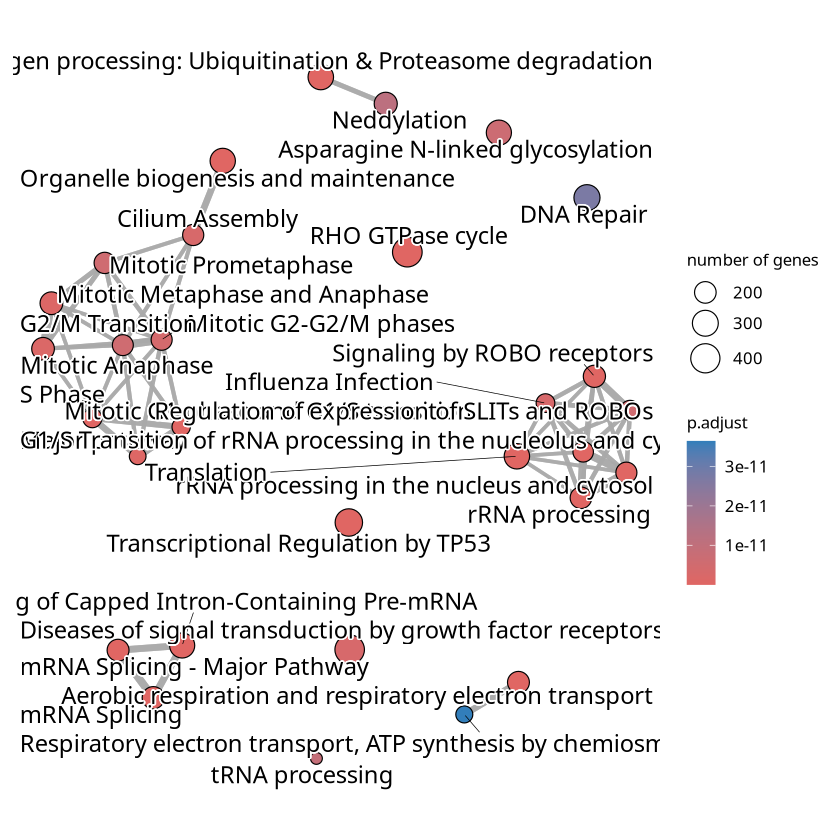

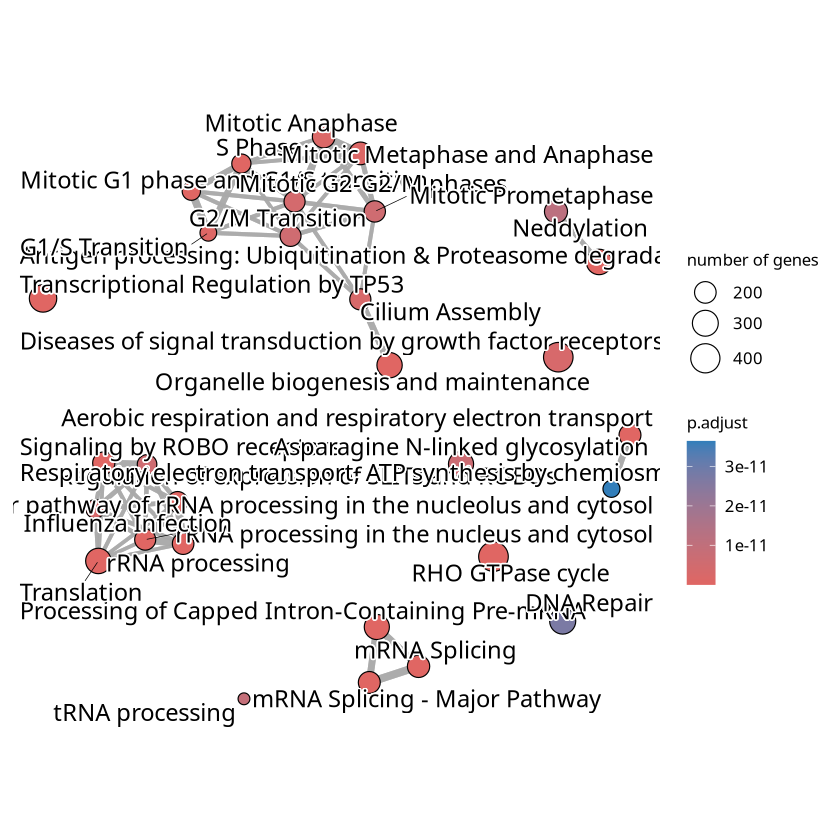

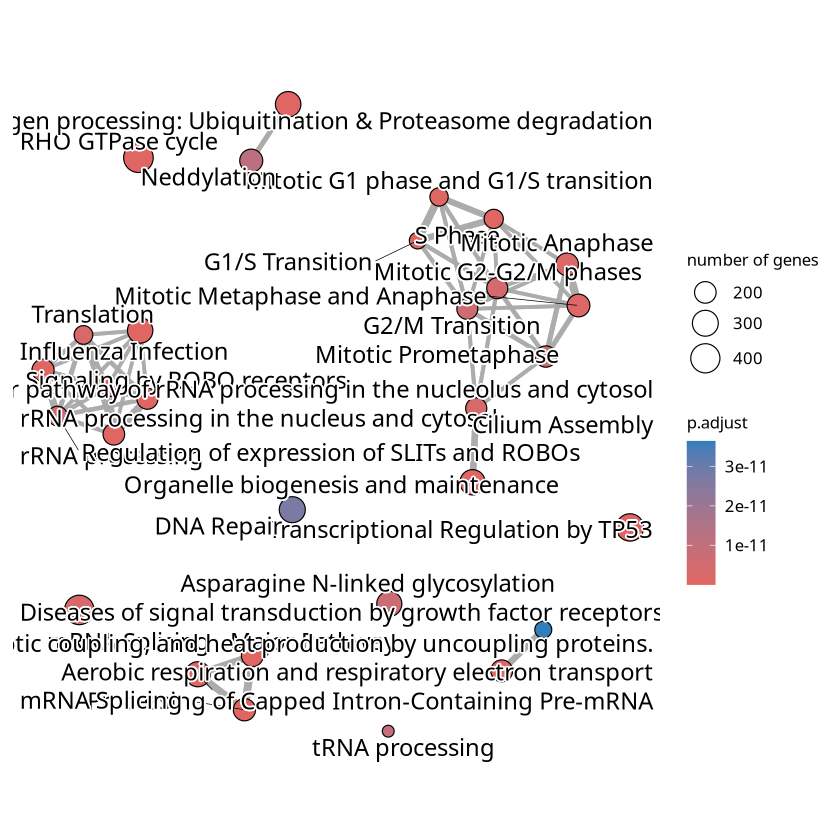

In [43]:
reactome_WTvsC9_sim <- pairwise_termsim(reactome_WTvsC9)
reactome_WTvsFUS_sim <- pairwise_termsim(reactome_WTvsFUS)
reactome_C9vsFUS_sim <- pairwise_termsim(reactome_C9vsFUS)

emapplot(reactome_WTvsC9_sim)
emapplot(reactome_WTvsFUS_sim)
emapplot(reactome_C9vsFUS_sim)